In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as pl
from netCDF4 import Dataset

filepath='/fs/ess/PFS0220/eurec4a/case_feb2nd_1024_200m_jan30/eurec4a.default.0000000.nc'

ds=xr.open_dataset(filepath,decode_times=True)
rootgroup = Dataset(filepath,"r")
for group in rootgroup.groups:
    ds=xr.merge([ds, xr.open_dataset(filepath,group=group,decode_times=True)])

filepath='/fs/ess/PFS0220/eurec4a/case_feb2nd_1024_200m_jan31/eurec4a.default.0000000.nc'
ds2=xr.open_dataset(filepath,decode_times=True)
rootgroup = Dataset(filepath,"r")
for group in rootgroup.groups:
    ds2=xr.merge([ds2, xr.open_dataset(filepath,group=group,decode_times=True)])

<xarray.Dataset>
Dimensions:               (time: 996, z: 176, zh: 177, p_rad: 141)
Coordinates:
  * time                  (time) datetime64[ns] 2020-01-31 ... 2020-02-03T10:...
  * z                     (z) float64 10.0 21.0 33.0 ... 2.818e+04 3.054e+04
  * zh                    (zh) float64 0.0 15.5 27.0 ... 2.936e+04 3.313e+04
  * p_rad                 (p_rad) float64 1.02e+05 9.635e+04 ... 3.692 3.376
Data variables: (12/169)
    iter                  (time) int32 ...
    area                  (time, z) float64 ...
    areah                 (time, zh) float64 ...
    u                     (time, z) float64 ...
    u_3                   (time, z) float64 ...
    u_4                   (time, z) float64 ...
    ...                    ...
    b2_diss               (time, z) float64 ...
    bw_visc               (time, zh) float64 ...
    bw_diss               (time, zh) float64 ...
    bw_rdstr              (time, zh) float64 ...
    bw_buoy               (time, zh) float64 ...
    bw_pres               (time, zh) float64 ...

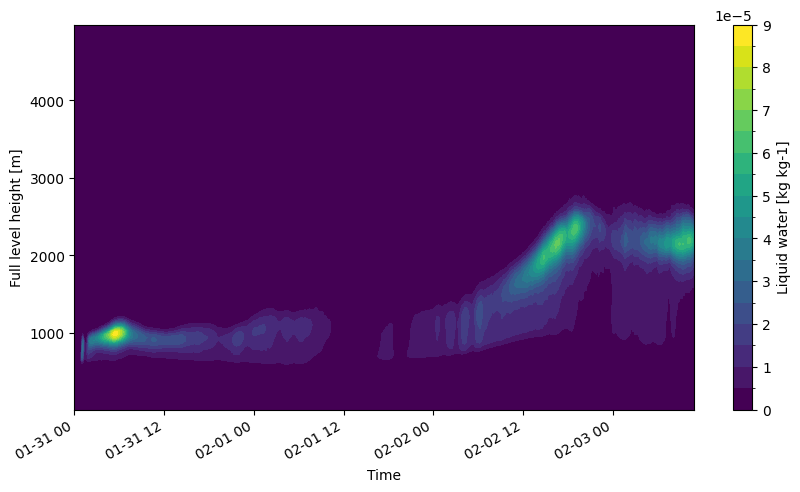

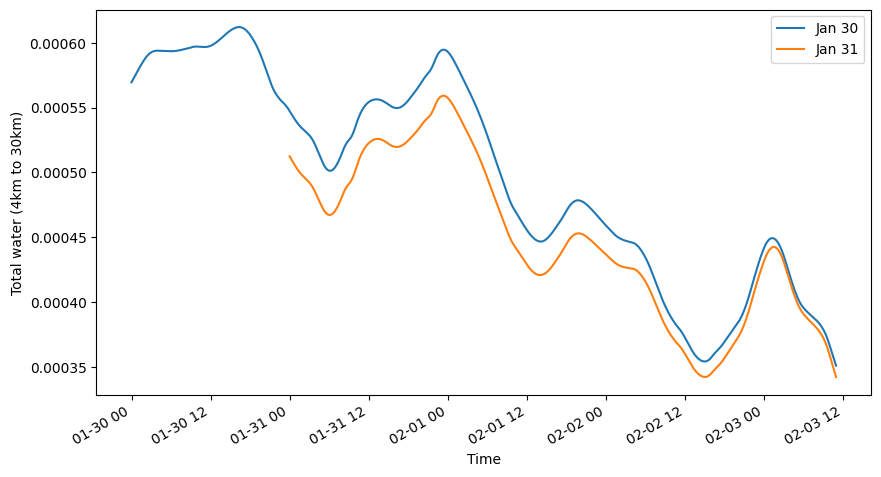

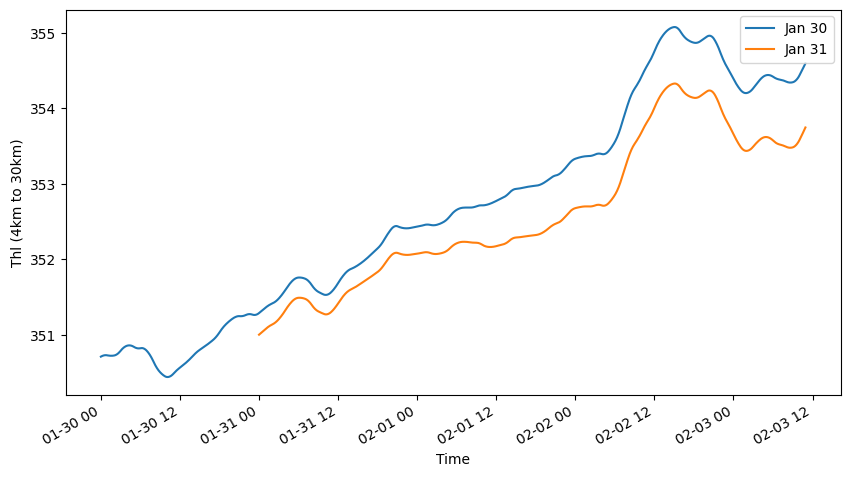

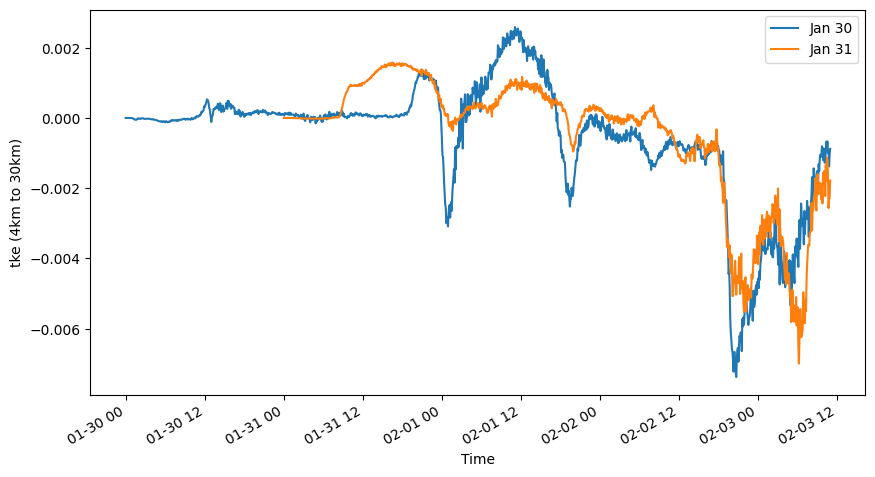

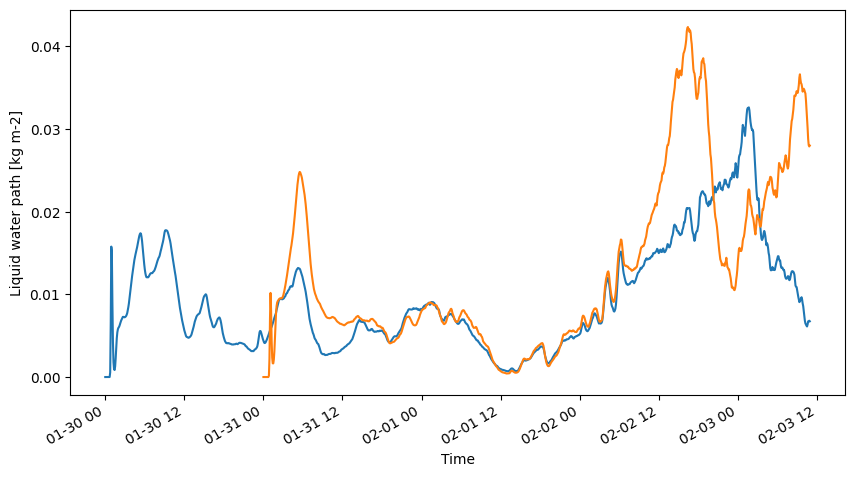

In [31]:

pl.figure(figsize=(10, 5))
ds2.sel(z=slice(0,5000)).ql.plot.contourf(x='time',y='z',levels=20)

pl.figure(figsize=(10, 5))
ds.sel(z=slice(4000,30000)).qt.mean(dim='z').plot.line(x='time',label='Jan 30')
ds2.sel(z=slice(4000,30000)).qt.mean(dim='z').plot.line(x='time',label='Jan 31')
pl.ylabel('Total water (4km to 30km)')
pl.legend()

pl.figure(figsize=(10, 5))
ds.sel(z=slice(4000,30000)).thl.mean(dim='z').plot.line(x='time',label='Jan 30')
ds2.sel(z=slice(4000,30000)).thl.mean(dim='z').plot.line(x='time',label='Jan 31')
pl.ylabel('Thl (4km to 30km)')
pl.legend()

pl.figure(figsize=(10, 5))
ds.sel(z=slice(4000,30000)).tke_buoy.sum(dim='z').plot.line(x='time',label='Jan 30')
ds2.sel(z=slice(4000,30000)).tke_buoy.sum(dim='z').plot.line(x='time',label='Jan 31')
pl.ylabel('tke (4km to 30km)')
pl.legend()

pl.figure(figsize=(10, 5))
ds.ql_path.plot(x='time')
ds2.ql_path.plot(x='time')

ds2